In [2]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns




In [46]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno
import re
import os.path
import math
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from scipy import sparse
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from skmultilearn.problem_transform import LabelPowerset
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier


import nltk
from wordcloud import WordCloud
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import unicodedata

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
nltk.download('wordnet')

#plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.8)

from helper_functions import *




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yashmehta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yashmehta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [86]:
df = pd.read_csv("leetcode_questions.csv", encoding = "ISO-8859-1")
df.head()

,Question Title,Question Description,Examples,Question Title Plus Description,Similar Questions Titles,Similar Questions Links,Array,Hash Table,Linked List,Math,...,Recursion,Memoization,Queue,Minimax,Map,Random,Sliding Window,Searching,Unnamed: 40,Unnamed: 41
0,Numbers With Repeated Digits,"Given a positive integer N, return the number ...",Example 1:\nInput: 20\nOutput: 1\nExplanation:...,Numbers With Repeated Digits Given a positive ...,NaN,NaN,0,0,0,1,...,0,0,0,0,0,0,0,0,NaN,NaN
1,Capacity To Ship Packages Within D Days,A conveyor belt has packages that must be ship...,"Example 1:\nInput: weights = [1,2,3,4,5,6,7,8,...",Capacity To Ship Packages Within D Days A conv...,NaN,NaN,1,0,0,0,...,0,0,0,0,0,0,0,0,NaN,51.0
2,Pairs of Songs With Total Durations Divisible ...,"In a list of songs, the i-th song has a durati...","Example 1:\nInput: [30,20,150,100,40]\nOutput:...",Pairs of Songs With Total Durations Divisible ...,NaN,NaN,1,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,Complement of Base 10 Integer,Every non-negative integer N has a binary repr...,Example 1:\nInput: 5\nOutput: 2\nExplanation: ...,Complement of Base 10 Integer Every non-negati...,NaN,NaN,0,0,0,1,...,0,0,0,0,0,0,0,0,NaN,NaN
4,Construct Binary Search Tree from Preorder Tra...,Return the root node of a binary search tree t...,"Example 1:\nInput: [8,5,1,7,10,12]\nOutput: [8...",Construct Binary Search Tree from Preorder Tra...,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [87]:
df = df.drop(['Examples','Similar Questions Titles','Similar Questions Links'], axis=1)

In [88]:
counts = []
categories = list(df.columns.values)
for i in categories:
    counts.append((i, df[i].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number_of_questions'])
df_stats

TypeError: coercing to Unicode: need string or buffer, int found

Text(0.5,0,'# of categories')

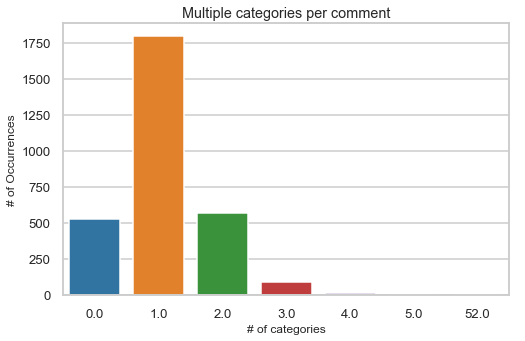

In [55]:
rowsums = df.iloc[:,2:].sum(axis=1)
x=rowsums.value_counts()
#plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple categories per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of categories', fontsize=12)

In [56]:
print('Number of missing comments in comment text:')
df['Question Title Plus Description'].isnull().sum()

Number of missing comments in comment text:


0

In [89]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

df['Question Title Plus Description'] = df['Question Title Plus Description'].map(lambda com : clean_text(com))
df['Question Title Plus Description'][0]

u'numbers with repeated digits given a positive integer n return the number of positive integers less than or equal to n that have at least 1 repeated digit'

In [90]:
df = df.drop(['Unnamed: 40'], axis=1)
df = df.drop(['Unnamed: 41'], axis=1)

In [91]:
train, test = train_test_split(df, random_state=42, test_size=0.10, shuffle=True)

In [60]:
train = train.rename(columns={'Question Title Plus Description': 'Question_Title_Plus_Description'})
test = test.rename(columns={'Question Title Plus Description': 'Question_Title_Plus_Description'})

In [92]:
test

,Question Title,Question Description,Question Title Plus Description,Array,Hash Table,Linked List,Math,Two Pointers,String,Binary Search,...,Segment Tree,Binary Search Tree,Recursion,Memoization,Queue,Minimax,Map,Random,Sliding Window,Searching
744,Same Tree,"Given two binary trees, write a function to ch...",same tree given two binary trees write a funct...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
678,Binary Search Tree Iterator,Implement an iterator over a binary search tre...,binary search tree iterator implement an itera...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2289,Difference series,"Given a series of numbers 3,10,21,36 â¦., an...",difference series given a series of numbers 3 ...,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2487,Circular tour,Consider circular track with n points marked a...,circular tour consider circular track with n p...,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
942,Design Hit Counter,Design a hit counter which counts the number o...,design hit counter design a hit counter which ...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2821,Edit Distance,Given two strings str1 and str2 and below oper...,edit distance given two strings str1 and str2 ...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289,Flood Fill,An image is represented by a 2-D array of inte...,flood fill an image is represented by a 2 d ar...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
433,Relative Ranks,"Given scores of N athletes, find their relativ...",relative ranks given scores of n athletes find...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2672,Range of Composite numbers,"Given an integer n, we need to find a range of...",range of composite numbers given an integer n ...,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2473,Compare two fractions,"Given two fractions a/b and c/d, compare them ...",compare two fractions given two fractions a b ...,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
X_train = train.Question_Title_Plus_Description
X_test = test.Question_Title_Plus_Description
print(X_train.shape)
print(X_test.shape)

(2705,)
(301,)


In [64]:
categories = categories.drop(['Question Title Plus Description'], axis=1)

AttributeError: 'list' object has no attribute 'drop'

In [80]:
categories.remove('Question Title Plus Description')

In [68]:
# mydata_test

# new_test_X = mydata_test['Question Title','Question Description']
# predictions[0]
UIdata = {}
for j, row in prediction.iterrows():
# for j in range(len(predictions)):
    categories = ''
#     print(predictions[j])
    for i in range(len(row)):
#         print(row[i])
        if(str(row[i])=='1'):
            categories += category_columns[i] + ','
    UIdata[mydata_test.iloc[j]['Question Title']] = [mydata_test.iloc[j]['Question Description'],categories[:len(categories)-1] ]

# accuracy(test_y, predictions)

UIdata
import json
with open('JsonOneVsRest.json', 'w') as outfile:  
    json.dump(UIdata, outfile)
    

# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    print(classification_report(test[category], prediction))

... Processing Array
              precision    recall  f1-score   support

           0       0.83      1.00      0.90       239
           1       0.92      0.19      0.32        62

   micro avg       0.83      0.83      0.83       301
   macro avg       0.87      0.59      0.61       301
weighted avg       0.85      0.83      0.78       301

... Processing Hash Table
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       291
           1       0.00      0.00      0.00        10

   micro avg       0.97      0.97      0.97       301
   macro avg       0.48      0.50      0.49       301
weighted avg       0.93      0.97      0.95       301

... Processing Linked List
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       296
           1       0.00      0.00      0.00         5

   micro avg       0.98      0.98      0.98       301
   macro avg       0.49      0.50      0.50       301


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       298
           1       0.00      0.00      0.00         3

   micro avg       0.99      0.99      0.99       301
   macro avg       0.50      0.50      0.50       301
weighted avg       0.98      0.99      0.99       301

... Processing Binary Search Tree
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       295
           1       0.00      0.00      0.00         6

   micro avg       0.98      0.98      0.98       301
   macro avg       0.49      0.50      0.49       301
weighted avg       0.96      0.98      0.97       301

... Processing Recursion
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       299
           1       0.00      0.00      0.00         2

   micro avg       0.99      0.99      0.99       301
   macro avg       0.50      0.50      0.50       301
weighted avg   

KeyError: u'Unnamed: 40'

In [69]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [106]:
categories

[u'Array',
 u'Hash Table',
 u'Linked List',
 u'Math',
 u'Two Pointers',
 u'String',
 u'Binary Search',
 u'Divide and Conquer',
 u'Dynamic Programming',
 u'Backtracking',
 u'Stack',
 u'Heap',
 u'Greedy',
 u'Sort',
 u'Bit Manipulation',
 u'Tree',
 u'Depth-first Search',
 u'Breadth-first Search',
 u'Union Find',
 u'Graph',
 u'Design',
 u'Topological Sort',
 u'Trie',
 u'Binary Indexed Tree',
 u'Segment Tree',
 u'Binary Search Tree',
 u'Recursion',
 u'Memoization',
 u'Queue',
 u'Minimax',
 u'Map',
 u'Random',
 u'Sliding Window',
 u'Searching']

In [41]:
df_categories = df.drop(['Question Title Plus Description'], axis = 1)
categories = list(df_categories.columns.values)
categories

[u'Array',
 u'Hash Table',
 u'Linked List',
 u'Math',
 u'Two Pointers',
 u'String',
 u'Binary Search',
 u'Divide and Conquer',
 u'Dynamic Programming',
 u'Backtracking',
 u'Stack',
 u'Heap',
 u'Greedy',
 u'Sort',
 u'Bit Manipulation',
 u'Tree',
 u'Depth-first Search',
 u'Breadth-first Search',
 u'Union Find',
 u'Graph',
 u'Design',
 u'Topological Sort',
 u'Trie',
 u'Binary Indexed Tree',
 u'Segment Tree',
 u'Binary Search Tree',
 u'Recursion',
 u'Memoization',
 u'Queue',
 u'Minimax',
 u'Map',
 u'Random',
 u'Sliding Window',
 u'Searching']

In [118]:
# mydata_test

# new_test_X = mydata_test['Question Title','Question Description']
# predictions[0]
# UIdata = {}
# for j, row in prediction.iterrows():
# # for j in range(len(predictions)):
#     categories = ''
# #     print(predictions[j])
#     for i in range(len(row)):
# #         print(row[i])
#         if(str(row[i])=='1'):
#             categories += category_columns[i] + ','
#     UIdata[mydata_test.iloc[j]['Question Title']] = [mydata_test.iloc[j]['Question Description'],categories[:len(categories)-1] ]

# # accuracy(test_y, predictions)

# UIdata
# import json
# with open('JsonOneVsRest.json', 'w') as outfile:  
#     json.dump(UIdata, outfile)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
f1Score = {}
accuracyScore = {}
precisionScore={}
recall_Score = {}
start_pointer = 0
end_pointer = 300
for i in range(10):
    print('------------------------------------')
    train = pd.concat([df.iloc[0:start_pointer], df.iloc[end_pointer:]])
    test = df.iloc[start_pointer:end_pointer]
    start_pointer = end_pointer
    end_pointer = end_pointer + 300
    
    X_train = train['Question Title Plus Description']
    X_test = test['Question Title Plus Description']
    
    LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
    for category in categories:
        print('... Processing {}'.format(category))
        # train the model using X_dtm & y
        LogReg_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
        prediction = LogReg_pipeline.predict(X_test)
#         print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
#         print('Test precision is {}'.format(accuracy_score(test[category], prediction)))
#         print('Test recall is {}'.format(accuracy_score(test[category], prediction)))
#         print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
        if category in f1Score:
#             if(float(format(f1_score(test[category], prediction)))!=0.0):
            f1Score[category] += float(format(f1_score(test[category], prediction)))
                
#             if(float(format(accuracy_score(test[category], prediction)))!=0.0):
            accuracyScore[category] += float(format(accuracy_score(test[category], prediction)))
                
#             if(float(format(precision_score(test[category], prediction)))!=0.0):
            precisionScore[category] += float(format(precision_score(test[category], prediction)))
            recallScore[category] += float(format(recall_score(test[category], prediction)))
            
        else:
#             if(float(format(f1_score(test[category], prediction)))!=0.0):
            f1Score[category] = float(format(f1_score(test[category], prediction)))
                
#             if(float(format(accuracy_score(test[category], prediction)))!=0.0):
            accuracyScore[category] = float(format(accuracy_score(test[category], prediction)))
                
#             if(float(format(precision_score(test[category], prediction)))!=0.0):
            precisionScore[category] = float(format(precision_score(test[category], prediction)))
            recallScore[category] = float(format(recall_score(test[category], prediction)))

for key in f1Score:
    f1Score[key] = f1Score[key]/10
    accuracyScore[key] = accuracyScore[key]/10
    precisionScore[key] = precisionScore[key]/10
    recallScore[key] = recallScore[key]/10
    
print(f1Score)
print(accuracyScore)
print(precisionScore)
print(recallScore)




------------------------------------
... Processing Array
... Processing Hash Table
... Processing Linked List
... Processing Math
... Processing Two Pointers
... Processing String
... Processing Binary Search
... Processing Divide and Conquer
... Processing Dynamic Programming
... Processing Backtracking
... Processing Stack
... Processing Heap
... Processing Greedy
... Processing Sort
... Processing Bit Manipulation
... Processing Tree
... Processing Depth-first Search
... Processing Breadth-first Search
... Processing Union Find
... Processing Graph
... Processing Design
... Processing Topological Sort
... Processing Trie
... Processing Binary Indexed Tree
... Processing Segment Tree
... Processing Binary Search Tree
... Processing Recursion
... Processing Memoization
... Processing Queue
... Processing Minimax
... Processing Map
... Processing Random
... Processing Sliding Window
... Processing Searching
------------------------------------
... Processing Array
... Processing Hash 

... Processing Map
... Processing Random
... Processing Sliding Window
... Processing Searching
------------------------------------
... Processing Array
... Processing Hash Table
... Processing Linked List
... Processing Math
... Processing Two Pointers
... Processing String
... Processing Binary Search
... Processing Divide and Conquer
... Processing Dynamic Programming
... Processing Backtracking
... Processing Stack
... Processing Heap
... Processing Greedy
... Processing Sort
... Processing Bit Manipulation
... Processing Tree
... Processing Depth-first Search
... Processing Breadth-first Search
... Processing Union Find
... Processing Graph
... Processing Design
... Processing Topological Sort
... Processing Trie
... Processing Binary Indexed Tree
... Processing Segment Tree
... Processing Binary Search Tree
... Processing Recursion
... Processing Memoization
... Processing Queue
... Processing Minimax
... Processing Map
... Processing Random
... Processing Sliding Window
... Pro

In [119]:
import json
data = {'f1Score' : f1Score, 'accuracyScore' : accuracyScore, 'precisionScore' : precisionScore, 'recallScore' : recallScore}
with open('LogisticRegressionReport.json', 'w') as outfile:  
    json.dump(data, outfile)

In [83]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [49]:
# mydata_test

# new_test_X = mydata_test['Question Title','Question Description']
# predictions[0]
UIdata = {}
for j, row in prediction.iterrows():
# for j in range(len(predictions)):
    categories = ''
#     print(predictions[j])
    for i in range(len(row)):
#         print(row[i])
        if(str(row[i])=='1'):
            categories += category_columns[i] + ','
    UIdata[mydata_test.iloc[j]['Question Title']] = [mydata_test.iloc[j]['Question Description'],categories[:len(categories)-1] ]

# accuracy(test_y, predictions)

UIdata
import json
with open('JsonOneVsRest.json', 'w') as outfile:  
    json.dump(UIdata, outfile)

AttributeError: 'numpy.ndarray' object has no attribute 'iterrows'

In [50]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [44]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing Array
Test accuracy is 0.87707641196
... Processing Hash Table
Test accuracy is 0.966777408638
... Processing Linked List
Test accuracy is 1.0
... Processing Math
Test accuracy is 0.863787375415
... Processing Two Pointers
Test accuracy is 0.970099667774
... Processing String
Test accuracy is 0.887043189369
... Processing Binary Search
Test accuracy is 0.970099667774
... Processing Divide and Conquer
Test accuracy is 0.990033222591
... Processing Dynamic Programming
Test accuracy is 0.843853820598
... Processing Backtracking
Test accuracy is 0.976744186047
... Processing Stack
Test accuracy is 0.97342192691
... Processing Heap
Test accuracy is 0.980066445183
... Processing Greedy
Test accuracy is 0.97342192691
... Processing Sort
Test accuracy is 0.950166112957
... Processing Bit Manipulation
Test accuracy is 0.963455149502
... Processing Tree
Test accuracy is 0.966777408638
... Processing Depth-first Search
Test accuracy is 0.950166112957
... Processing Breadth-first Se

/anaconda2/envs/problemsClassifierEnv/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


Test accuracy is 0.996677740864
... Processing Queue
Test accuracy is 0.990033222591
... Processing Minimax
Test accuracy is 0.993355481728
... Processing Map
Test accuracy is 0.990033222591
... Processing Random
Test accuracy is 1.0
... Processing Sliding Window
Test accuracy is 0.990033222591
... Processing Searching
Test accuracy is 0.980066445183


In [71]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]